<a href="https://colab.research.google.com/github/JeremiasPanozzo/Artificial-intelligence-Python/blob/main/PanozzoJeremias_B%C3%BAsquedas_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

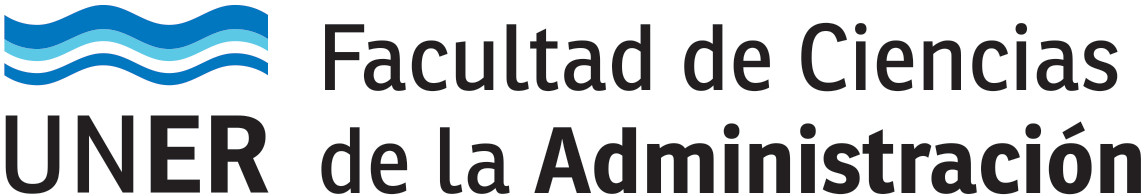

# **Inteligencia Artificial**
### **Primer Cuatrimestre 2025**

## **Práctico 2 - Búsquedas con Python**

### **Condiciones de entrega**
#### Fecha límite para compartir el enlace del archivo colab con los docentes y realizar la entrega en el campus: 28/04/2025 23:59hs.
##### El práctico debe ser realizado en forma individual. Deben crear una copia para guardar sus avances y una vez finalizadas las actividades deben compartir el Colab con los docentes.

### **N-reinas***

El problema de las N-Reinas es un clásico problema en teoría de la computación. Consiste en ubicar N-reinas en un tablero de ajedrez de N×N casillas, de forma tal que ninguna reina ataque a otra.

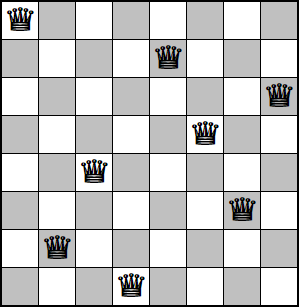

 A partir del siguiente código *Python* donde se presenta una solución para el problema de las n-reinas.



1.   Adecuar la implementación para n-torres.


In [ ]:
"""Puzzle n-torres."""
class NRooks:
    """Genere todas las soluciones válidas para el puzzle de n torres"""
    def __init__(self, size):
        # Almacene el tamaño del puzzle (problema) y la cantidad de soluciones válidas
        self.size = size
        self.solutions = 0
        self.solve()

    def solve(self):
        """Resuelve el puzzle de las n torres e imprime el número de soluciones"""
        positions = [-1] * self.size
        self.put_rook(positions, 0)
        print("Found", self.solutions, "solutions.")

    def put_rook(self, positions, target_row):
        """
        Intente colocar una torre en target_row marcando todos los N casos posibles.
        Si se encuentra un lugar válido, la función se llama a sí misma tratando de colocar
        una reina en la siguiente fila hasta que todas las N torres se colocan en el tablero NxN.
        """
        # Caso base (corte): todas las N filas están ocupadas
        if target_row == self.size:
            self.show_full_board(positions)
            # self.show_short_board(positions)
            self.solutions += 1
        else:
            # Para todas las posiciones de N columnas, intente colocar una torre
            for column in range(self.size):
                # Rechazar todas las posiciones inválidas
                if self.check_place(positions, target_row, column):
                    positions[target_row] = column
                    self.put_rook(positions, target_row + 1)


    def check_place(self, positions, ocuppied_rows, column):
        """
        Compruebe si una posición determinada está siendo atacada
        por alguna de las torres colocadas anteriormente
        (verifique las posiciones de la columna y la diagonal)
        """
        for i in range(ocuppied_rows):
            if positions[i] == column:
                return False
        return True

    def show_full_board(self, positions):
        """Mostrar el tablero completo de NxN"""
        for row in range(self.size):
            line = ""
            for column in range(self.size):
                if positions[row] == column:
                    line += "T "
                else:
                    line += ". "
            print(line)
        print("\n")

    def show_short_board(self, positions):
        """
        Muestre las posiciones de las torres en el tablero en forma comprimida,
        cada número representa la posición de la columna ocupada en la fila correspondiente.
        """
        line = ""
        for i in range(self.size):
            line += str(positions[i]) + " "
        print(line)

def main():
    """Inicializa y resuelve el rompecabezas de n torres"""
    NRooks(4)

if __name__ == "__main__":
    # execute only if run as a script
    main()

## **Puzzle**
Problema que consiste en alcanzar una ubicación objetivo, pudiendo mover únicamente las piezas adyacentes a un lugar determinado. **"z"** para este caso particular.

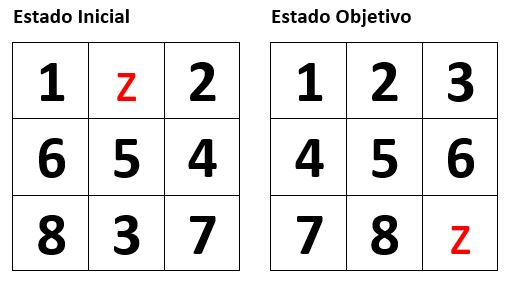

Para resolver este ejercicio primero deben instalar la librería ***simpleai*** en *Colab*.

Esta libreria implementa muchos de los algoritmos de inteligencia artificial descritos en el libro **"Inteligencia Artificial: un Enfoque Moderno"**, de *Stuart Russel* y *Peter Norvig*.

Para eso ejecuten el siguiente código.

In [ ]:
pip install simpleai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleai: filename=simpleai-0.8.3-py3-none-any.whl size=100982 sha256=bb45849e3bf38ae80425a075faef1b4e7172042b0d659f9974857c6d6cef7d38
  Stored in directory: /root/.cache/pip/wheels/ec/02/a7/f0077617a5f73eb1c52e45f12a9da3f0bafff3902bcd91766f
Successfully built simpleai


## Actividades

1.   Indique que tipo de algoritmo de los dados en clase está implementado en el código (Resolvente de problemas, búsqueda local, problema de satisfacción de restricciones, búsqueda adversaria o sus subtipos).





**Introduzca aquí su respuesta...**
El algoritmo que esta implementado en el codigo es el **algoritmo A*** (resolvente de problemas), que es un algoritmo de busqueda informada. En este caso se utiliza la distancia Manhattan como heuristica.

2.   Completar con el código correspondiente en los lugares indicados:

In [ ]:
#
# Completar con el código correspondiente
#
from simpleai.search import astar, SearchProblem

# Clase que contiene métodos para resolver el puzzle.
class PuzzleSolver(SearchProblem):

    # Explicar el objetivo de "def actions(self, cur_state)"
    # Esta funcion toma un estado actual y devuelve una lista con todas las fichas valizas para mover.
    def actions(self, cur_state):
        rows = string_to_list(cur_state)
        row_empty, col_empty = get_location(rows, 'z')

        actions = []
        if row_empty > 0:
            actions.append(rows[row_empty - 1][col_empty])
        if row_empty < 2:
            actions.append(rows[row_empty + 1][col_empty])
        if col_empty > 0:
            actions.append(rows[row_empty][col_empty - 1])
        if col_empty < 2:
            actions.append(rows[row_empty][col_empty + 1])
        return actions

    # Devuelve el estado resultante después de mover una pieza al espacio vacío
    def result(self, state, action):
        rows = string_to_list(state)
        row_empty, col_empty = get_location(rows, 'z')
        row_new, col_new = get_location(rows, action)

        rows[row_empty][col_empty], rows[row_new][col_new] = \
                rows[row_new][col_new], rows[row_empty][col_empty]

        return list_to_string(rows)

    # Retorna verdadero si el estado es estado objetivo
    def is_goal(self, state):
        return state == GOAL

    # Explicar el objetivo de "def heuristic(self, state)"
    # Indicar que heurística se utiliza
    # Esta funcion estima cuánto falta para llegar a completar el puzzle desde un estado dado. Está utilizando la distancia Manhattan como heuristica.
    # La suma de movimientos necesarios para llegar al objetivo
    def heuristic(self, state):
        rows = string_to_list(state)

        distance = 0

        for number in '12345678z':
            row_new, col_new = get_location(rows, number)
            row_new_goal, col_new_goal = goal_positions[number]

            distance += abs(row_new - row_new_goal) + abs(col_new - col_new_goal)

        return distance

# Convierte lista en string
def list_to_string(input_list):
    return '\n'.join(['-'.join(x) for x in input_list])

# Convierte string en lista
def string_to_list(input_string):
    return [x.split('-') for x in input_string.split('\n')]

# Encuentra la ubicación 2D del elemento de entrada
def get_location(rows, input_element):
    for i, row in enumerate(rows):
        for j, item in enumerate(row):
            if item == input_element:
                return i, j

# Final result that we want to achieve
GOAL = '''1-2-3
4-5-6
7-8-z'''

# Starting point
INITIAL = '''1-z-2
6-5-4
8-3-7'''

#Crea un caché para la posición de la meta de cada pieza.
goal_positions = {}
rows_goal = string_to_list(GOAL)
for number in '12345678z':
    goal_positions[number] = get_location(rows_goal, number)


# Explicar el objetivo de "result"
# result contiene el camino encontrado por el algoritmo A*.
result = astar(PuzzleSolver(INITIAL))
# Muestra en pantalla los resultados
for i, (action, state) in enumerate(result.path()):
    print()
    if action == None:
        print('Configuración inicial')
    elif i == len(result.path()) - 1:
        print('Después de mover', action, 'al espacio vacío. Objetivo alcanzado!')
    else:
        print('Después de mover', action, 'al espacio vacío')

    print(state)


Configuración inicial
1-z-2
6-5-4
8-3-7

Después de mover 5 al espacio vacío
1-5-2
6-z-4
8-3-7

Después de mover 4 al espacio vacío
1-5-2
6-4-z
8-3-7

Después de mover 7 al espacio vacío
1-5-2
6-4-7
8-3-z

Después de mover 3 al espacio vacío
1-5-2
6-4-7
8-z-3

Después de mover 4 al espacio vacío
1-5-2
6-z-7
8-4-3

Después de mover 6 al espacio vacío
1-5-2
z-6-7
8-4-3

Después de mover 8 al espacio vacío
1-5-2
8-6-7
z-4-3

Después de mover 4 al espacio vacío
1-5-2
8-6-7
4-z-3

Después de mover 6 al espacio vacío
1-5-2
8-z-7
4-6-3

Después de mover 7 al espacio vacío
1-5-2
8-7-z
4-6-3

Después de mover 3 al espacio vacío
1-5-2
8-7-3
4-6-z

Después de mover 6 al espacio vacío
1-5-2
8-7-3
4-z-6

Después de mover 7 al espacio vacío
1-5-2
8-z-3
4-7-6

Después de mover 8 al espacio vacío
1-5-2
z-8-3
4-7-6

Después de mover 4 al espacio vacío
1-5-2
4-8-3
z-7-6

Después de mover 7 al espacio vacío
1-5-2
4-8-3
7-z-6

Después de mover 8 al espacio vacío
1-5-2
4-z-3
7-8-6

Después de mover 5 al e

3. Explicar que realiza el código en los lugares indicados:

In [ ]:
# Explicar el objetivo de "def actions(self, cur_state)"
# Esta funcion toma un estado actual y devuelve una lista con todas las fichas valizas para mover.

# Explicar el objetivo de "def heuristic(self, state)"
# Indicar que heurística se utiliza.
# Esta funcion estima cuánto falta para llegar a completar el puzzle desde un estado dado. Está utilizando la distancia Manhattan como heuristica.
# La suma de movimientos necesarios para llegar al objetivo

# Explicar el objetivo de "result"
# result contiene la lista de moviemintos a realizar para llegar a la solucion propuesta por A*

Código sobre el que deben trabajar:

In [ ]:
from simpleai.search import astar, SearchProblem

# Clase que contiene métodos para resolver el puzzle.
class PuzzleSolver(SearchProblem):
    #
    # Explicar el objetivo de "def actions(self, cur_state)"
    #
    def actions(self, cur_state):
        rows = string_to_list(cur_state)
        row_empty, col_empty = get_location(rows, 'e')

        actions = []
        if row_empty > 0:
            actions.append(rows[row_empty - 1][col_empty])
        if row_empty < 2:
            actions.append(rows[row_empty + 1][col_empty])
        if col_empty > 0:
            #
            # Completar con el código correspondiente
            #
        if col_empty < 2:
            #
            # Completar con el código correspondiente
            #
        return actions

    # Devuelve el estado resultante después de mover una pieza al espacio vacío
    def result(self, state, action):
        rows = string_to_list(state)
        row_empty, col_empty = get_location(rows, 'e')
        row_new, col_new = get_location(rows, action)

        rows[row_empty][col_empty], rows[row_new][col_new] = \
                rows[row_new][col_new], rows[row_empty][col_empty]

        return list_to_string(rows)

    # Retorna verdadero si el estado es estado objetivo
    def is_goal(self, state):
        return # Completar con el código correspondiente

    #
    # Explicar el objetivo de "def heuristic(self, state)"
    # Indicar que heurística se utiliza
    #
    def heuristic(self, state):
        rows = string_to_list(state)

        distance = 0

        for number in '12345678z':
            row_new, col_new = get_location(rows, number)
            row_new_goal, col_new_goal = goal_positions[number]

            distance += abs(row_new - row_new_goal) + abs(col_new - col_new_goal)

        return distance

# Convierte lista en string
def list_to_string(input_list):
    return '\n'.join(['-'.join(x) for x in input_list])

# Convierte string en lista
def string_to_list(input_string):
    return [x.split('-') for x in input_string.split('\n')]

# Encuentra la ubicación 2D del elemento de entrada
def get_location(rows, input_element):
    for i, row in enumerate(rows):
        for j, item in enumerate(row):
            if item == input_element:
                return i, j

# Final result that we want to achieve
GOAL = '''1-2-3
4-5-6
7-8-z'''

# Starting point
INITIAL =
##
## Completar con el código correspondiente
##

#Crea un caché para la posición de la meta de cada pieza.
goal_positions = {}
rows_goal = string_to_list(GOAL)
for number in '12345678z':
    goal_positions[number] = get_location(rows_goal, number)

#
# Explicar el objetivo de "result"
#
result = astar(PuzzleSolver(INITIAL))

# Muestra en pantalla los resultados
for i, (action, state) in enumerate(result.path()):
    print()
    if action == None:
        print('Configuración inicial')
    elif i == len(result.path()) - 1:
        print('Después de mover', action, 'al espacio vacío. Objetivo alcanzado!')
    else:
        print('Después de mover', action, 'al espacio vacío')

    print(state)

IndentationError: expected an indented block after 'if' statement on line 17 (<ipython-input-4-c4d56a76fa45>, line 21)

## **PSR**: Coloreo del mapa
El problema consistente en colorear un mapa con determinados colores de forma que no haya vecinos que tengan el mismo color.
Para este práctico les pedimos que asignen los colores rojo, violeta, azul y verde a cada departamento de la provincia de Entre Ríos, de forma tal que se cumpla la restricción de que no existan vecinos que tengan el mismo color.

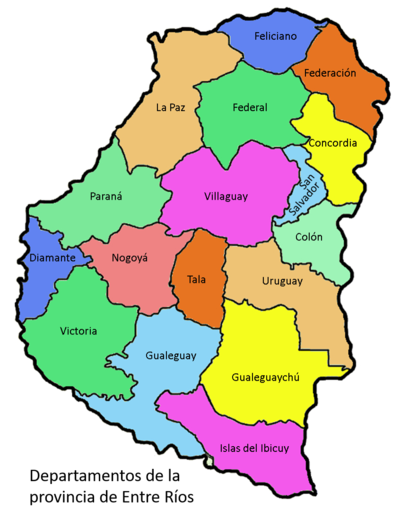

1. ¿Qué método o técnica se podría utilizar para determinar la menor cantidad de colores necesarios para resolver el problema? Explicar.

Se podria plantear el problema como un problema de satisfaccion de restricciones, dado que no me importa como se llega al objetivo (todas las ciudades coloreadas de forma valida), sino que me importa encontrar la configuracion correcta.

**Introduzca aquí su respuesta...**

2. Resolver utilizando la libreria [simpleai](https://simpleai.readthedocs.io/en/latest/constraint_satisfaction_problems.html).

In [ ]:
# Introduzca aquí su solución.
from simpleai.search import CspProblem, backtrack

# Esta funcion implementa la restriccion de que dos ciudades limitrofes no deben ser del mismo color
def funcion_restriccion(ciudades, colores):
    ciudad1, ciudad2 = ciudades
    color1, color2 = colores

    # Verificamos que los colores sean diferentes
    return color1 != color2

if __name__ == "__main__":

  #Lista con las ciudades de Entre Rios
  departamentos = ('Concordia', 'Federacion', 'Feliciano', 'La Paz',
             'Federal', 'San Salvador', 'Villaguay', 'Colon',
             'Uruguay', 'Gualeguaychu', 'Islas del Ibicuy',
             'Gualeguay' ,'Tala', 'Nogoya','Victoria',
             'Diamante','Parana')

  colores = dict((depto, ['red', 'green', 'blue', 'violet']) for depto in departamentos)

  vecinos = [
      (('Villaguay', 'Federal'), funcion_restriccion),
      (('Villaguay', 'San Salvador'), funcion_restriccion),
      (('Villaguay', 'Colon'), funcion_restriccion),
      (('Villaguay', 'Uruguay'), funcion_restriccion),
      (('Villaguay', 'Tala'), funcion_restriccion),
      (('Villaguay', 'Nogoya'), funcion_restriccion),
      (('Villaguay', 'Parana'), funcion_restriccion),
      (('Villaguay', 'La Paz'), funcion_restriccion),
      (('Tala', 'Nogoya'), funcion_restriccion),
      (('Tala', 'Uruguay'), funcion_restriccion),
      (('Tala', 'Gualeguaychu'), funcion_restriccion),
      (('Tala', 'Gualeguay'), funcion_restriccion),
      (('Islas del Ibicuy', 'Gualeguaychu'), funcion_restriccion),
      (('Islas del Ibicuy', 'Gualeguay'), funcion_restriccion),
      (('Gualeguay', 'Victoria'), funcion_restriccion),
      (('Gualeguay', 'Nogoya'), funcion_restriccion),
      (('Gualeguay', 'Gualeguaychu'), funcion_restriccion),
      (('Victoria', 'Nogoya'), funcion_restriccion),
      (('Victoria', 'Diamante'), funcion_restriccion),
      (('Parana', 'Diamante'), funcion_restriccion),
      (('Parana', 'Nogoya'), funcion_restriccion),
      (('Parana', 'La Paz'), funcion_restriccion),
      (('Feliciano', 'Federal'), funcion_restriccion),
      (('Feliciano', 'Federacion'), funcion_restriccion),
      (('Feliciano', 'La Paz'), funcion_restriccion),
      (('Federacion', 'Federal'), funcion_restriccion),
      (('Concordia', 'Federacion'), funcion_restriccion),
      (('Concordia', 'Federal'), funcion_restriccion),
      (('Concordia', 'San Salvador'), funcion_restriccion),
      (('Concordia', 'Colon'), funcion_restriccion),
      (('Colon', 'San Salvador'), funcion_restriccion),
      (('Colon', 'Uruguay'), funcion_restriccion),
      (('Diamante', 'Nogoya'), funcion_restriccion),
    ]

  problema = CspProblem(departamentos, colores, vecinos)
  salida = backtrack(problema)

  print('\nMapa de colores\n')
  for (x, y) in salida.items():
    print(x, "-->", y)


Mapa de colores

Concordia --> red
Federacion --> green
Feliciano --> red
La Paz --> green
Federal --> blue
San Salvador --> green
Villaguay --> red
Colon --> blue
Uruguay --> green
Gualeguaychu --> red
Islas del Ibicuy --> green
Gualeguay --> blue
Tala --> violet
Nogoya --> green
Victoria --> red
Diamante --> blue
Parana --> violet


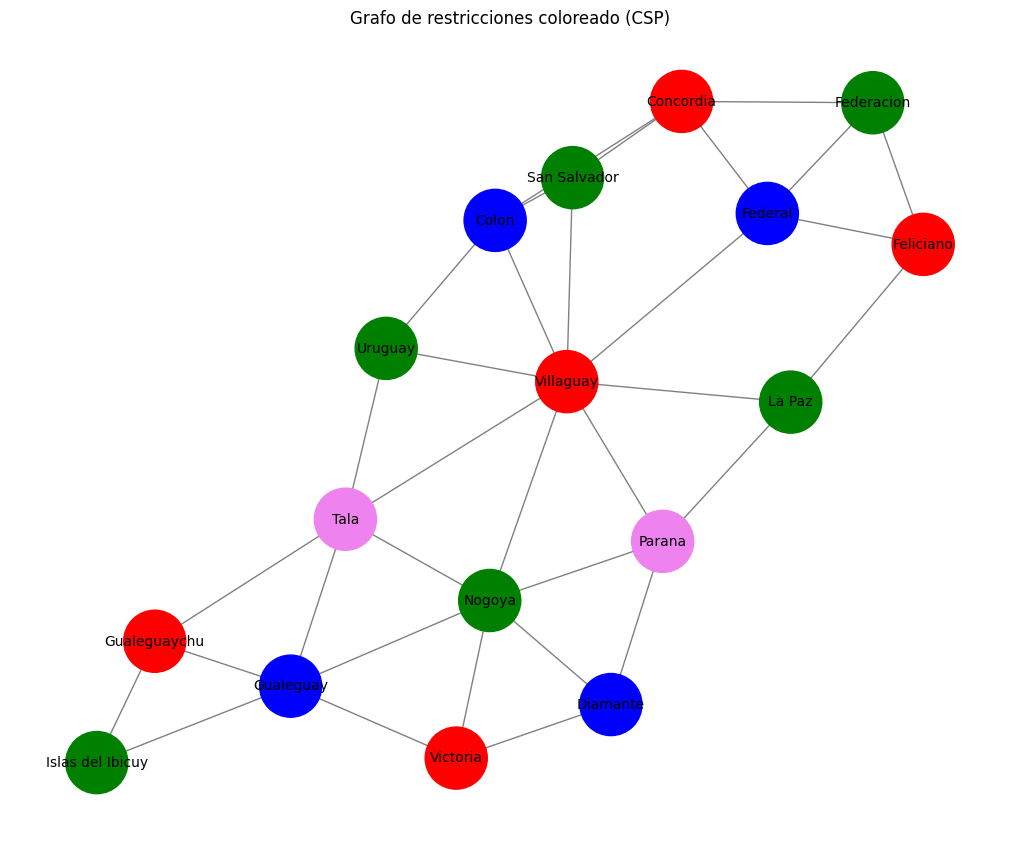

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo con networkx
G = nx.Graph()
G.add_edges_from([(a, b) for (a, b), _ in vecinos])

# Dibujar el grafo coloreado
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Extraer colores desde la solución
node_colors = [salida[n] for n in G.nodes()]

nx.draw(G, pos, with_labels=True,
        node_color=node_colors, node_size=2000,
        font_size=10, edge_color='gray')

plt.title("Grafo de restricciones coloreado (CSP)")
plt.show()

## **Misioneros y caníbales**

Tres misioneros y tres caníbales se encuentran en la orilla de un río. Todos deben cruzar al otro lado utilizando un bote que solo puede llevar a **una o dos personas por vez**. En ningún momento puede haber más caníbales que misioneros, tanto en las orillas como en el bote, ya que los caníbales devorarían a los misioneros.
Hay que encontrar la "configuración" para lograr que los seis individuos crucen el río sanos y salvos.



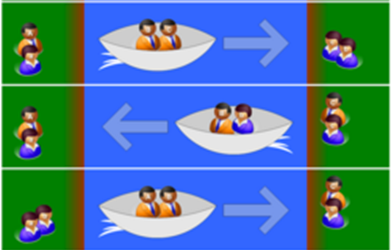

1. Elegir algún tipo de búsqueda visto en clases para resolver el problema y justificar su elección.

Se necesita un algoritmo sistematico que recuerde los caminos seguidos hasta la solucion. En este caso decidi usar busqueda en anchura porque

**Introduzca aquí su respuesta...**

2. Resuelvan el acertijo utilizando el tipo de búsqueda elegido en el punto anterior. Explicar cada línea de código con comentarios.

**Recuerden**:

Estado incial = todos en la orilla izquierda

Estado objetivo = todos en la orilla derecha

In [ ]:
from simpleai.search import SearchProblem, breadth_first

# Definimos el problema de búsqueda
class MisionerosCanibales(SearchProblem):
    def actions(self, estado_actual):

        # Cuántos misioneros hay en la izquierda.
        # Cuántos caníbales hay en la izquierda.
        # En qué lado está el bote (0 = izquierda, 1 = derecha).
        misioneros_izq, canibales_izq, bote = estado_actual
        acciones = [] # Lista vacia con las acciones validas que se pueden hacer

        # Solo podemos mover si hay bote en ese lado
        if bote == 0:  # Bote en la izquierda
            direccion = -1
        else:          # Bote en la derecha
            direccion = 1

        # Todas las combinaciones posibles
        movimientos = [
            (1, 0),  # 1 misionero
            (2, 0),  # 2 misioneros
            (0, 1),  # 1 caníbal
            (0, 2),  # 2 caníbales
            (1, 1),  # 1 misionero y 1 caníbal
        ]

        # Iteramos por cada movimiento del bote
        for misionero, canibal in movimientos:
            nuevo_m_izq = misioneros_izq + direccion * misionero
            nuevo_c_izq = canibales_izq + direccion * canibal

            if 0 <= nuevo_m_izq <= 3 and 0 <= nuevo_c_izq <= 3:
                # Chequear que no haya más caníbales que misioneros en ambos lados
                m_izq_ok = (nuevo_m_izq == 0 or nuevo_m_izq >= nuevo_c_izq)
                m_der_ok = ((3 - nuevo_m_izq) == 0 or (3 - nuevo_m_izq) >= (3 - nuevo_c_izq))
                if m_izq_ok and m_der_ok:
                    acciones.append((misionero, canibal))

        return acciones
    # Esta funcion retorna que nuevo estado obtengo si aplico una accion a un estado.
    def result(self, estado, action):
        misioneros_izq, canibales_izq, bote = estado
        m, c = accion

        if bote == 0:
          direccion = -1
        else:
          direccion = 1

        nuevo_estado = (
            misioneros_izq + direccion * m,
            canibales_izq + direccion * c,
            1 - bote  # cambiar el lado del bote
        )
        return nuevo_estado

    # Devuelve true si no haya nadie en la izquierda y el bote esté en la derecha.
    def is_goal(self, state):
        return state == (0, 0, 1)  # Todos en la derecha, bote en la derecha

    #Funcion que determina el coste de cada movimiento
    def cost(self, state, action, state2):
        return 1  # Cada movimiento cuesta lo mismo

# Estado inicial: 3 misioneros, 3 caníbales, bote en la izquierda
estado_inicial = (3, 3, 0)

# Crear el problema
problema = MisionerosCanibales(estado_inicial)

# Resolverlo con búsqueda en amplitud (para encontrar la solución más corta)
resultado = breadth_first(problema)

# Mostrar resultado
print('Movimientos:')
for i, paso in enumerate(resultado.path()):
    accion, estado = paso
    if accion is not None:
        print(f'Movimiento {i}: {accion} -> Estado {estado}')
    else:
        print(f'Estado inicial: {estado}')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-03c9a32d8f7a>", line 73, in <cell line: 0>
    resultado = breadth_first(problema)
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/simpleai/search/traditional.py", line 16, in breadth_first
    return _search(problem,
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/simpleai/search/traditional.py", line 156, in _search
    expanded = node.expand()
               ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/simpleai/search/models.py", line 105, in expand
    for action in self.problem.actions(self.state):
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-8-03c9a32d8f7a>", line None, in actions
KeyboardInterrupt

During handling of the above exception, another excep